In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_treinamento = pd.read_csv('../arquivos_csv/treinamento4.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste4.csv', low_memory=False)

Melhores parâmetros encontrados: {'max_depth': 7, 'min_samples_split': 2}


  Credit_Score_Predito
0                 Good
1                 Good
2                 Good
3                 Good
4                 Good

Resultados no conjunto de treinamento (validação cruzada):
Acurácia no conjunto de treino: 0.6622


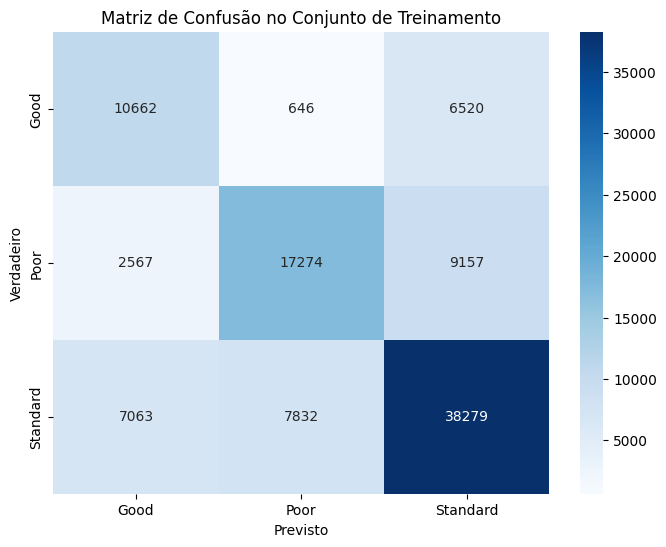

In [2]:
X_treino = df_treinamento.drop(columns=['Credit_Score'])
y_treino = df_treinamento['Credit_Score']

label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],  
    'min_samples_split': [2, 5, 10],
}
decision_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)

best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

best_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_tree_model.fit(X_treino, y_treino)

y_pred_teste = best_tree_model.predict(df_teste)

y_pred_teste_labels = label_encoder.inverse_transform(y_pred_teste)

predicoes_df = pd.DataFrame(y_pred_teste_labels, columns=['Credit_Score_Predito'])
print(predicoes_df.head())

predicoes_df.to_csv('../arquivos_csv/predicoes_credit_score_arvore.csv', index=False)

print("\nResultados no conjunto de treinamento (validação cruzada):")
y_pred_treino = grid_search.predict(X_treino)
accuracy = accuracy_score(y_treino, y_pred_treino)
conf_matrix = confusion_matrix(y_treino, y_pred_treino)
print(f"Acurácia no conjunto de treino: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão no Conjunto de Treinamento')
plt.show()